#### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the datasets

In [3]:
telco_data = pd.read_csv("//Users//swatishrivastava//Desktop//TELCO CHURN.csv")

#### set_option helps to look for all the column as well as rows

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### looking at the random 5 rows from the dataset

In [7]:
telco_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1760,2511-MORQY,Male,0,Yes,Yes,50,Yes,Yes,DSL,No,No,Yes,No,No,No,One year,No,Bank transfer (automatic),54.90,2614.1,No
5160,9840-EFJQB,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,74.35,74.35,No
289,3580-REOAC,Male,0,No,No,10,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.85,435.4,Yes
6935,4616-ULAOA,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7245.9,No
760,4013-GUXND,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.80,20.8,No


#### No of rows and columns

In [8]:
telco_data.shape

(7043, 21)

There are 7043 rows and 21 columns

#### Check for the names of columns

In [15]:
for count, col in enumerate(telco_data,1):
    print(count, col)

1 customerID
2 gender
3 SeniorCitizen
4 Partner
5 Dependents
6 tenure
7 PhoneService
8 MultipleLines
9 InternetService
10 OnlineSecurity
11 OnlineBackup
12 DeviceProtection
13 TechSupport
14 StreamingTV
15 StreamingMovies
16 Contract
17 PaperlessBilling
18 PaymentMethod
19 MonthlyCharges
20 TotalCharges
21 Churn


#### Getting the basic information

In [17]:
telco_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# As can be seen total charges should be in float but the data type is object
# So we need to change the datatype


telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'],errors = 'coerce')


In [23]:
telco_data["TotalCharges"].dtypes

dtype('float64')

#### Statistical analysis

In [25]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


So here SeniorCitizen column is a categorical column so all the descriptive
analysis of this column is incorrect

75% of the customer had tenure less than 55 months

Average Monthly charges are  USD 64.76 whereas 25% customers pay more than
USD 89.85 per month.

#### Missing value

In [29]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
percent_missing = telco_data.isnull().sum() * 100 / len(telco_data)

In [31]:
percent_missing

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

#### Checking out the rows with missing values

In [33]:
telco_data[telco_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of a missing value is very less we can simply
drop those rows with the missing values.

However, dropping the rows is not always a good idea, most importantly when
the columns are dependent on each other and percentage of missing values are 
more and also dependent.

We do have different methods to deal with the missing values.
Examples:
    for numerical column we use mean or median depending on the situation.
    
    for categorical column we use mode.

#### Dropping the missing values

In [34]:
telco_data.dropna(how="any", inplace=True)

In [35]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All the missing values are handled successfully.

In [43]:
telco_data["tenure"].nunique()

72

In [42]:
telco_data["tenure"].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

As we can see alone tenure is of no use so we can convert this tenure into groups and bins so that we can make use of it.

In [49]:
telco_data["tenure"].max()

72

In [62]:
# Grouping the tenure in bins of 12 months

labels = ["{0} - {1}".format(i,i+11) for i in range(1,72, 12)]

telco_data["tenure_group"] = pd.cut(x = telco_data["tenure"], bins=range(1,80, 12), right= False, labels = labels)

In [63]:
telco_data["tenure_group"].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

#### Dropping the unwanted column

In [67]:
telco_data.drop(columns=["customerID", "tenure"], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Univariate analysis

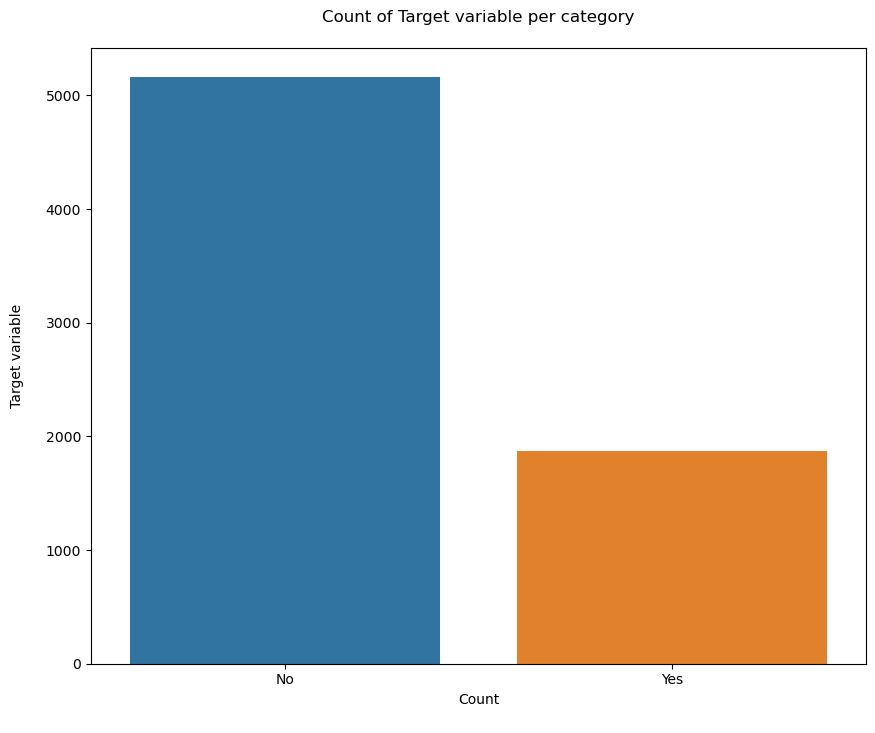

In [77]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Churn", data=telco_data)
plt.xlabel("Count\n")
plt.ylabel("Target variable\n")
plt.title("Count of Target variable per category\n")
plt.show()

In [78]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])


No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

We can see that data is highly imbalanced , ratio coming out to be 
73:27

We have to analyse the data with some other feature while taking the 
target values seperately to get some insights

##### Plot distribution of individual predictors by churn

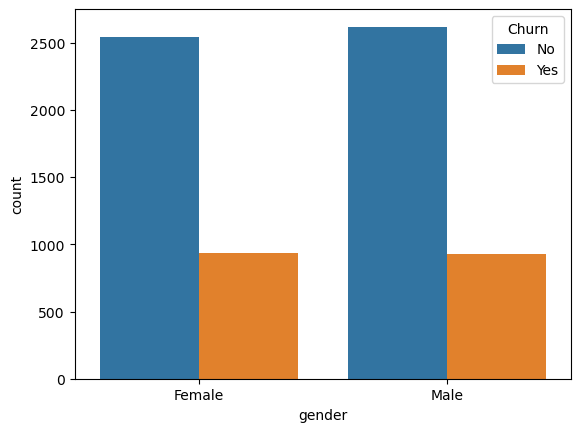

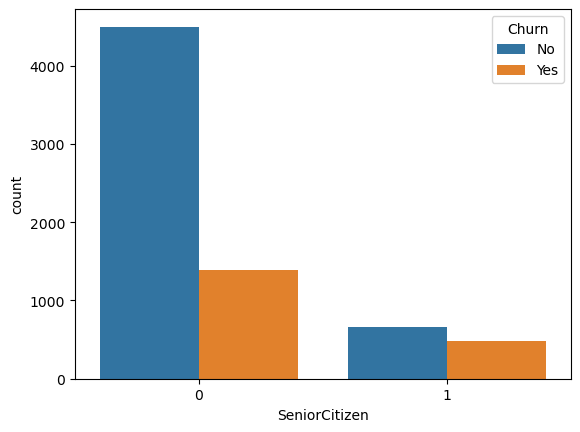

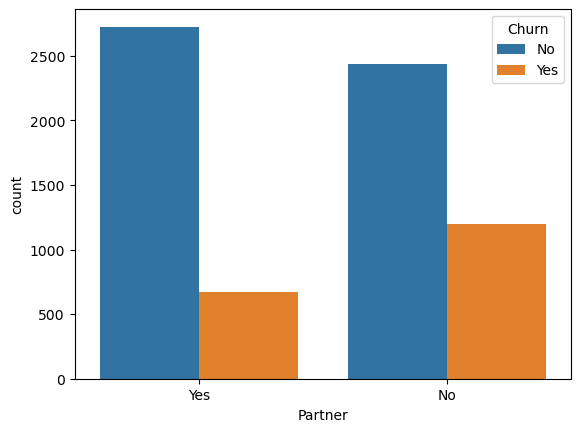

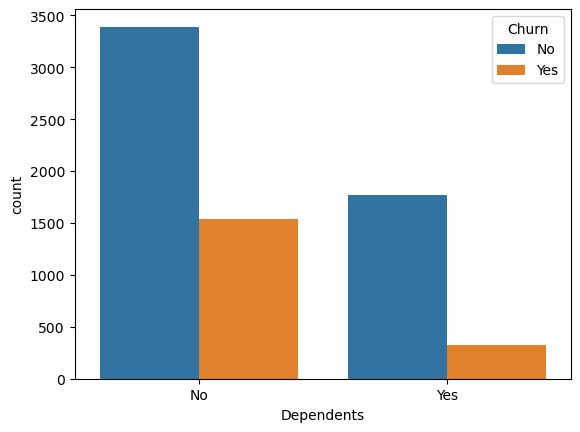

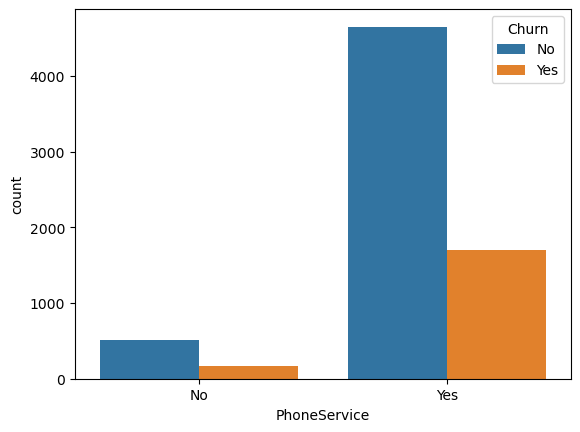

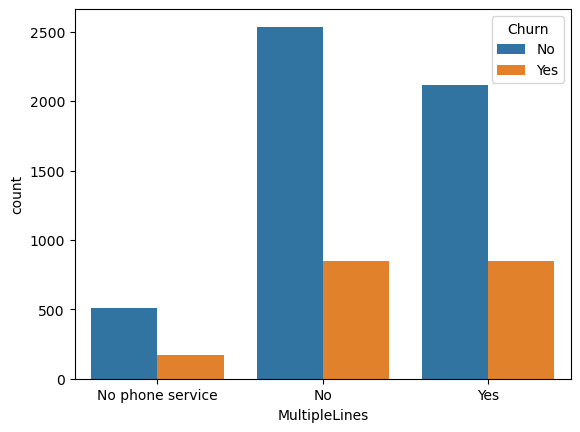

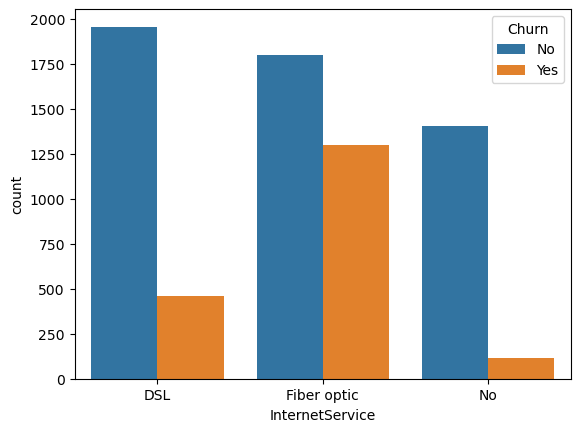

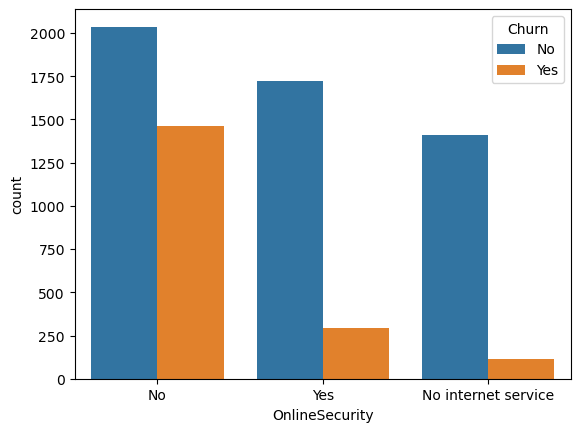

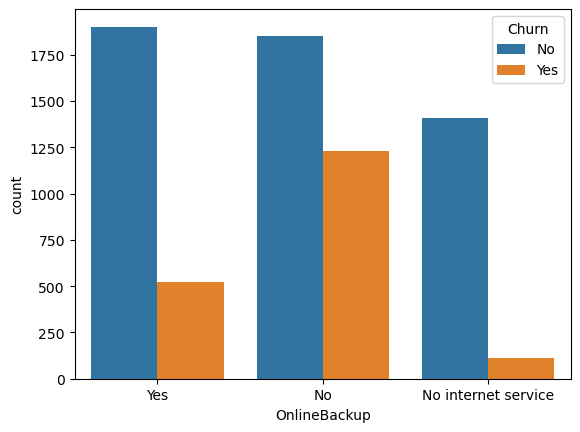

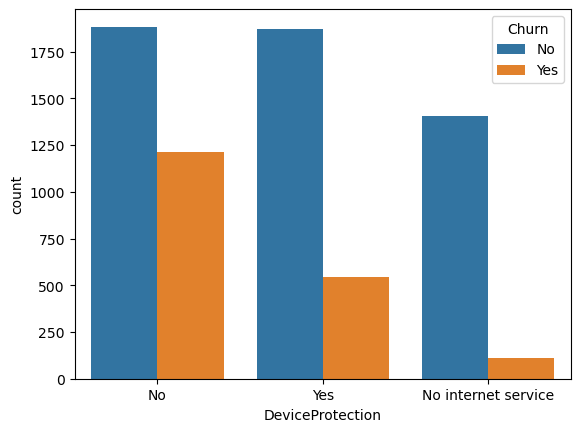

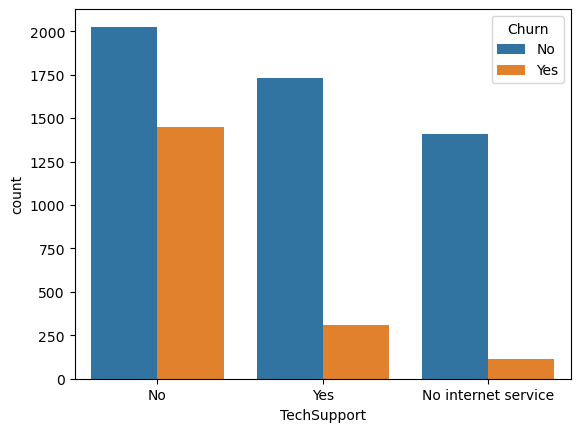

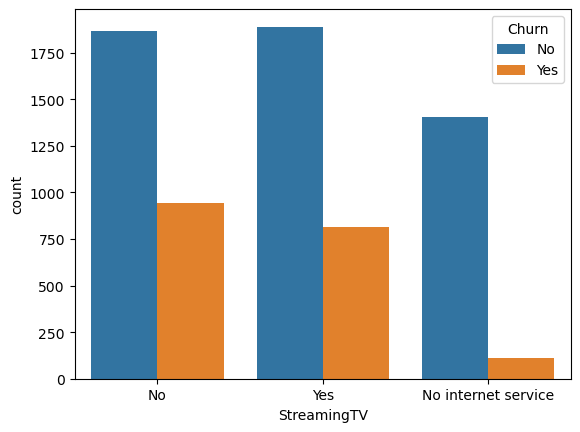

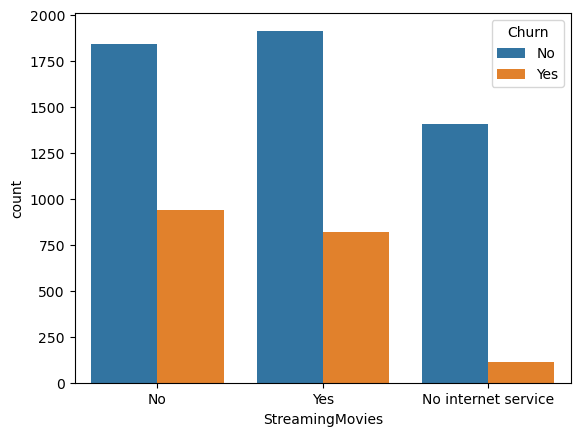

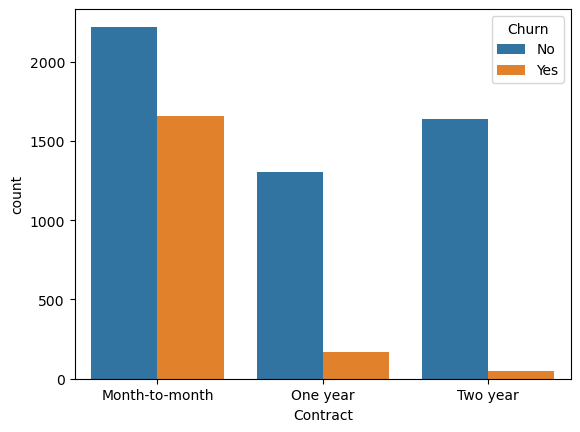

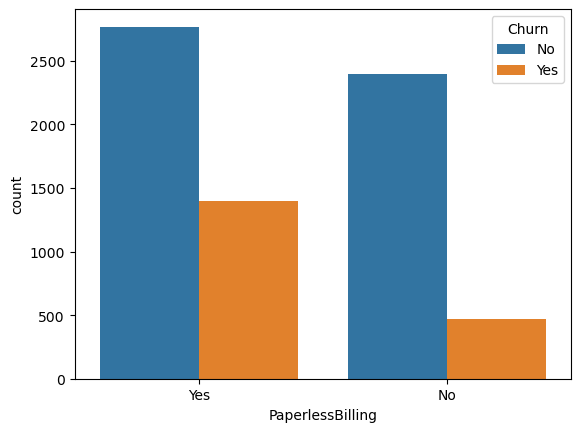

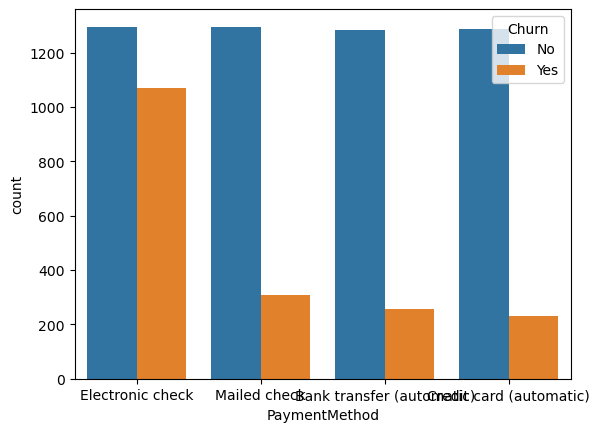

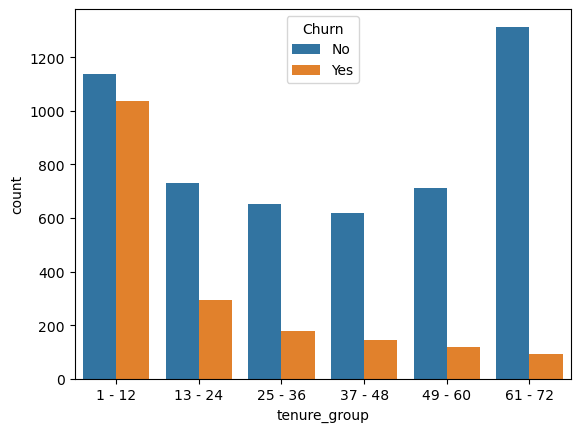

In [92]:
for col in telco_data.drop(columns=["Churn", "TotalCharges", "MonthlyCharges"]):
    plt.figure(col)
    sns.countplot(data=telco_data, x=col, hue=("Churn"))

### Converting the target variable "Churn" which is a categorical to numeric column

##### For this we will use label encoding method

In [93]:
from sklearn.preprocessing import LabelEncoder

# creating a instance of label encoder
le = LabelEncoder()

# Using .fit_transform function to fit label encoder and return encoder label
label  = le.fit_transform(telco_data["Churn"])

In [94]:
label

array([0, 0, 1, ..., 0, 1, 0])

In [95]:
# removing the column "Churn" from telco_data as it is of no use now
telco_data.drop(columns="Churn", axis=1, inplace=True)

#Appending the array to our dataframe with the new column name "Churn"
telco_data["Churn"] = label

In [98]:
telco_data.sample(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,Churn
2100,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),99.50,6841.45,61 - 72,0
3614,Male,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50,61 - 72,0
5584,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.50,896.90,1 - 12,1
1766,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.55,583.30,25 - 36,0
3120,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1718.35,61 - 72,0
3222,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),44.90,111.05,1 - 12,0
6643,Female,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.60,239.05,1 - 12,0
5093,Male,0,No,No,Yes,Yes,DSL,No,No,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),66.15,3199.00,49 - 60,0
725,Male,1,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.25,204.55,1 - 12,0
4980,Female,1,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.60,548.80,13 - 24,0


#### Converting all the categorical variables into dummy variables

In [100]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.sample(10)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
6576,0,20.30,41.20,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
5537,1,115.05,8016.60,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
6500,0,35.10,770.40,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
6445,0,90.65,367.95,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1213,0,20.20,1412.65,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
2781,1,44.40,265.80,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
6471,0,20.05,345.90,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1132,1,104.05,1133.65,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2802,1,104.90,3351.55,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
293,1,89.35,567.80,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [102]:
telco_data_dummies.shape

(7032, 51)

#### Relationship between Monthly Charges and Total Charges

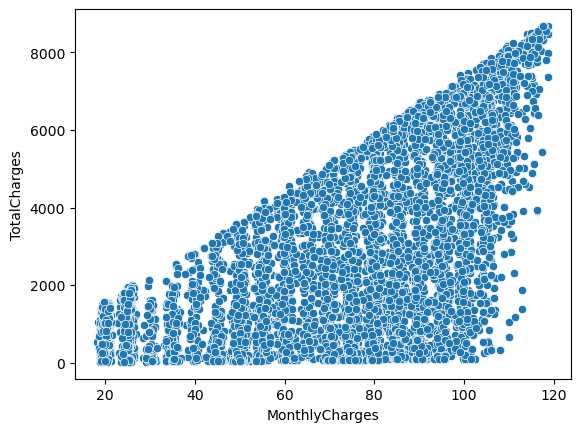

In [103]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=telco_data_dummies)
plt.show()

Total Charges increase as Monthly Charges increase - as expected.

#### Churn by Monthly Charges

In [ ]:
# here we will be using kde plot which help us to visualise the distribution of 
# observations in a dataset.

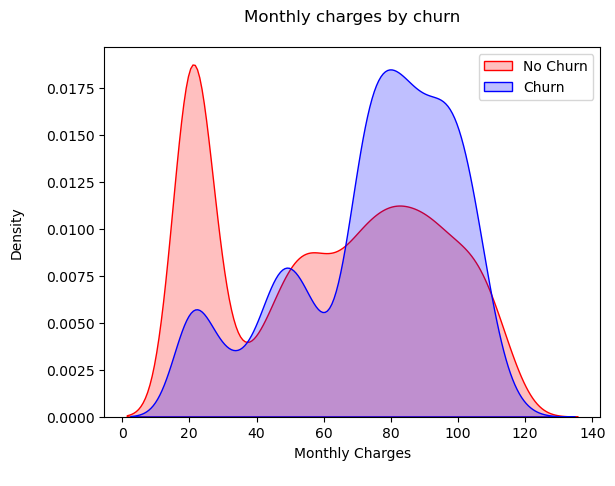

In [125]:
a1 = telco_data_dummies[telco_data_dummies["Churn"]==0]
a1_monthly_charges = a1["MonthlyCharges"]
ax1 = sns.kdeplot(a1_monthly_charges, color="Red", shade=True)
a2 = telco_data_dummies[telco_data_dummies["Churn"]==1]
a2_monthly_charges = a2["MonthlyCharges"]
ax1 = sns.kdeplot(a2_monthly_charges, color="Blue", shade=True)

ax1.legend(["No Churn","Churn"],loc='upper right')
ax1.set_ylabel('Density\n')
ax1.set_xlabel('Monthly Charges\n')
ax1.set_title('Monthly charges by churn\n')
plt.show()

Churn is high when the Monthly charges are high.

#### Churn by Total Charges

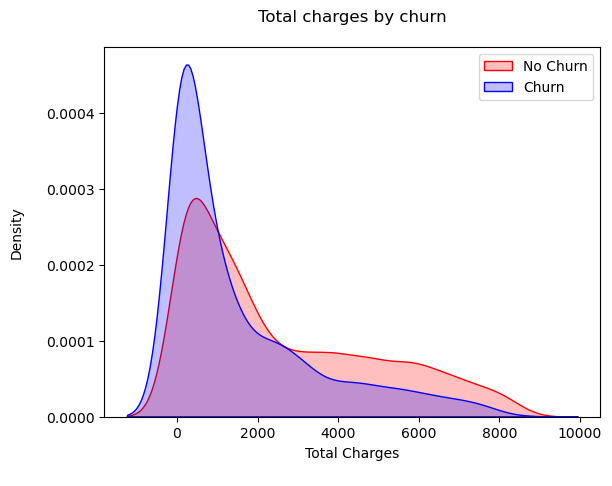

In [124]:
t1 = telco_data_dummies[telco_data_dummies["Churn"] == 0]
t1_total_Charges = t1["TotalCharges"]
tx1 = sns.kdeplot(t1_total_Charges, color="Red", shade=True)
t2 = telco_data_dummies[telco_data_dummies["Churn"] == 1]
t2_total_Charges = t2["TotalCharges"]
tx1 = sns.kdeplot(t2_total_Charges, color="Blue", shade=True)

tx1.legend(["No Churn","Churn"],loc='upper right')
tx1.set_ylabel('Density\n')
tx1.set_xlabel('Total Charges\n')
tx1.set_title('Total charges by churn\n')
plt.show()

Surprising thing to notice here is Higher Churn is at lower total charges

#### Correlation with respect to churn

<AxesSubplot:>

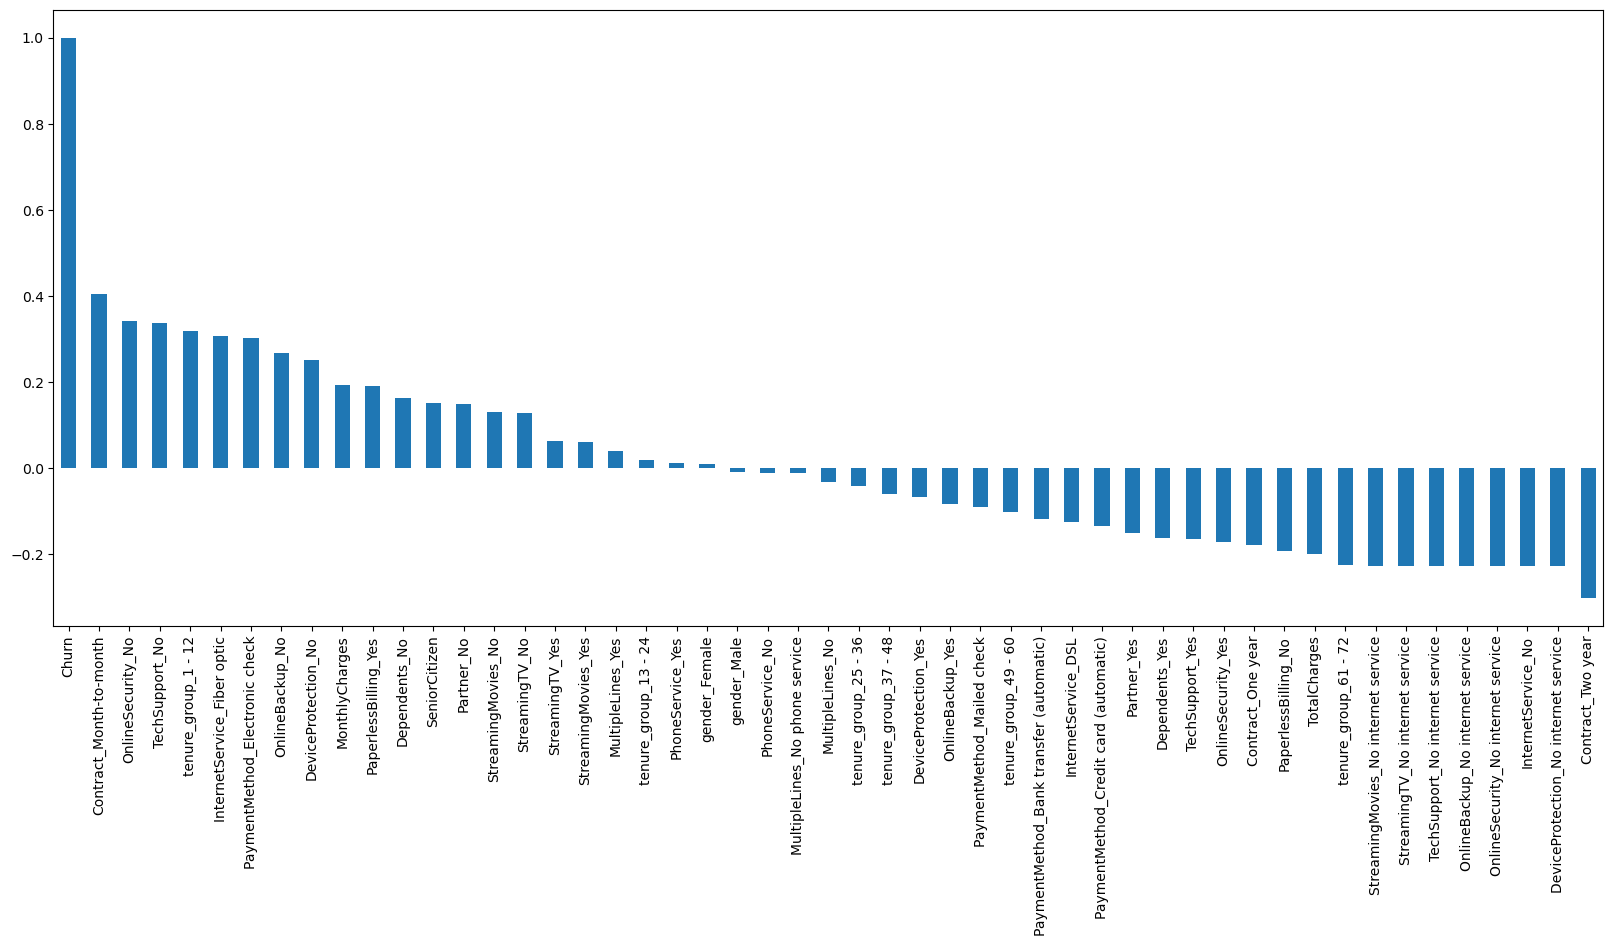

In [136]:

plt.figure(figsize=(20,8))
telco_data_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")


HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like gender, phoneService have almost zero impact on churn rate

In [155]:
telco_data_dummies.corr().T

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
SeniorCitizen,1.000000,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219874,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,-0.248033,0.248033,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.360220,-0.763191,0.296447,0.210126,-0.763191,0.441529,0.171057,-0.763191,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568,-0.191881,-0.047220,0.009465,0.017614,0.070048,0.185440
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.150541,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.001819,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.001819,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,-0.001

<AxesSubplot:>

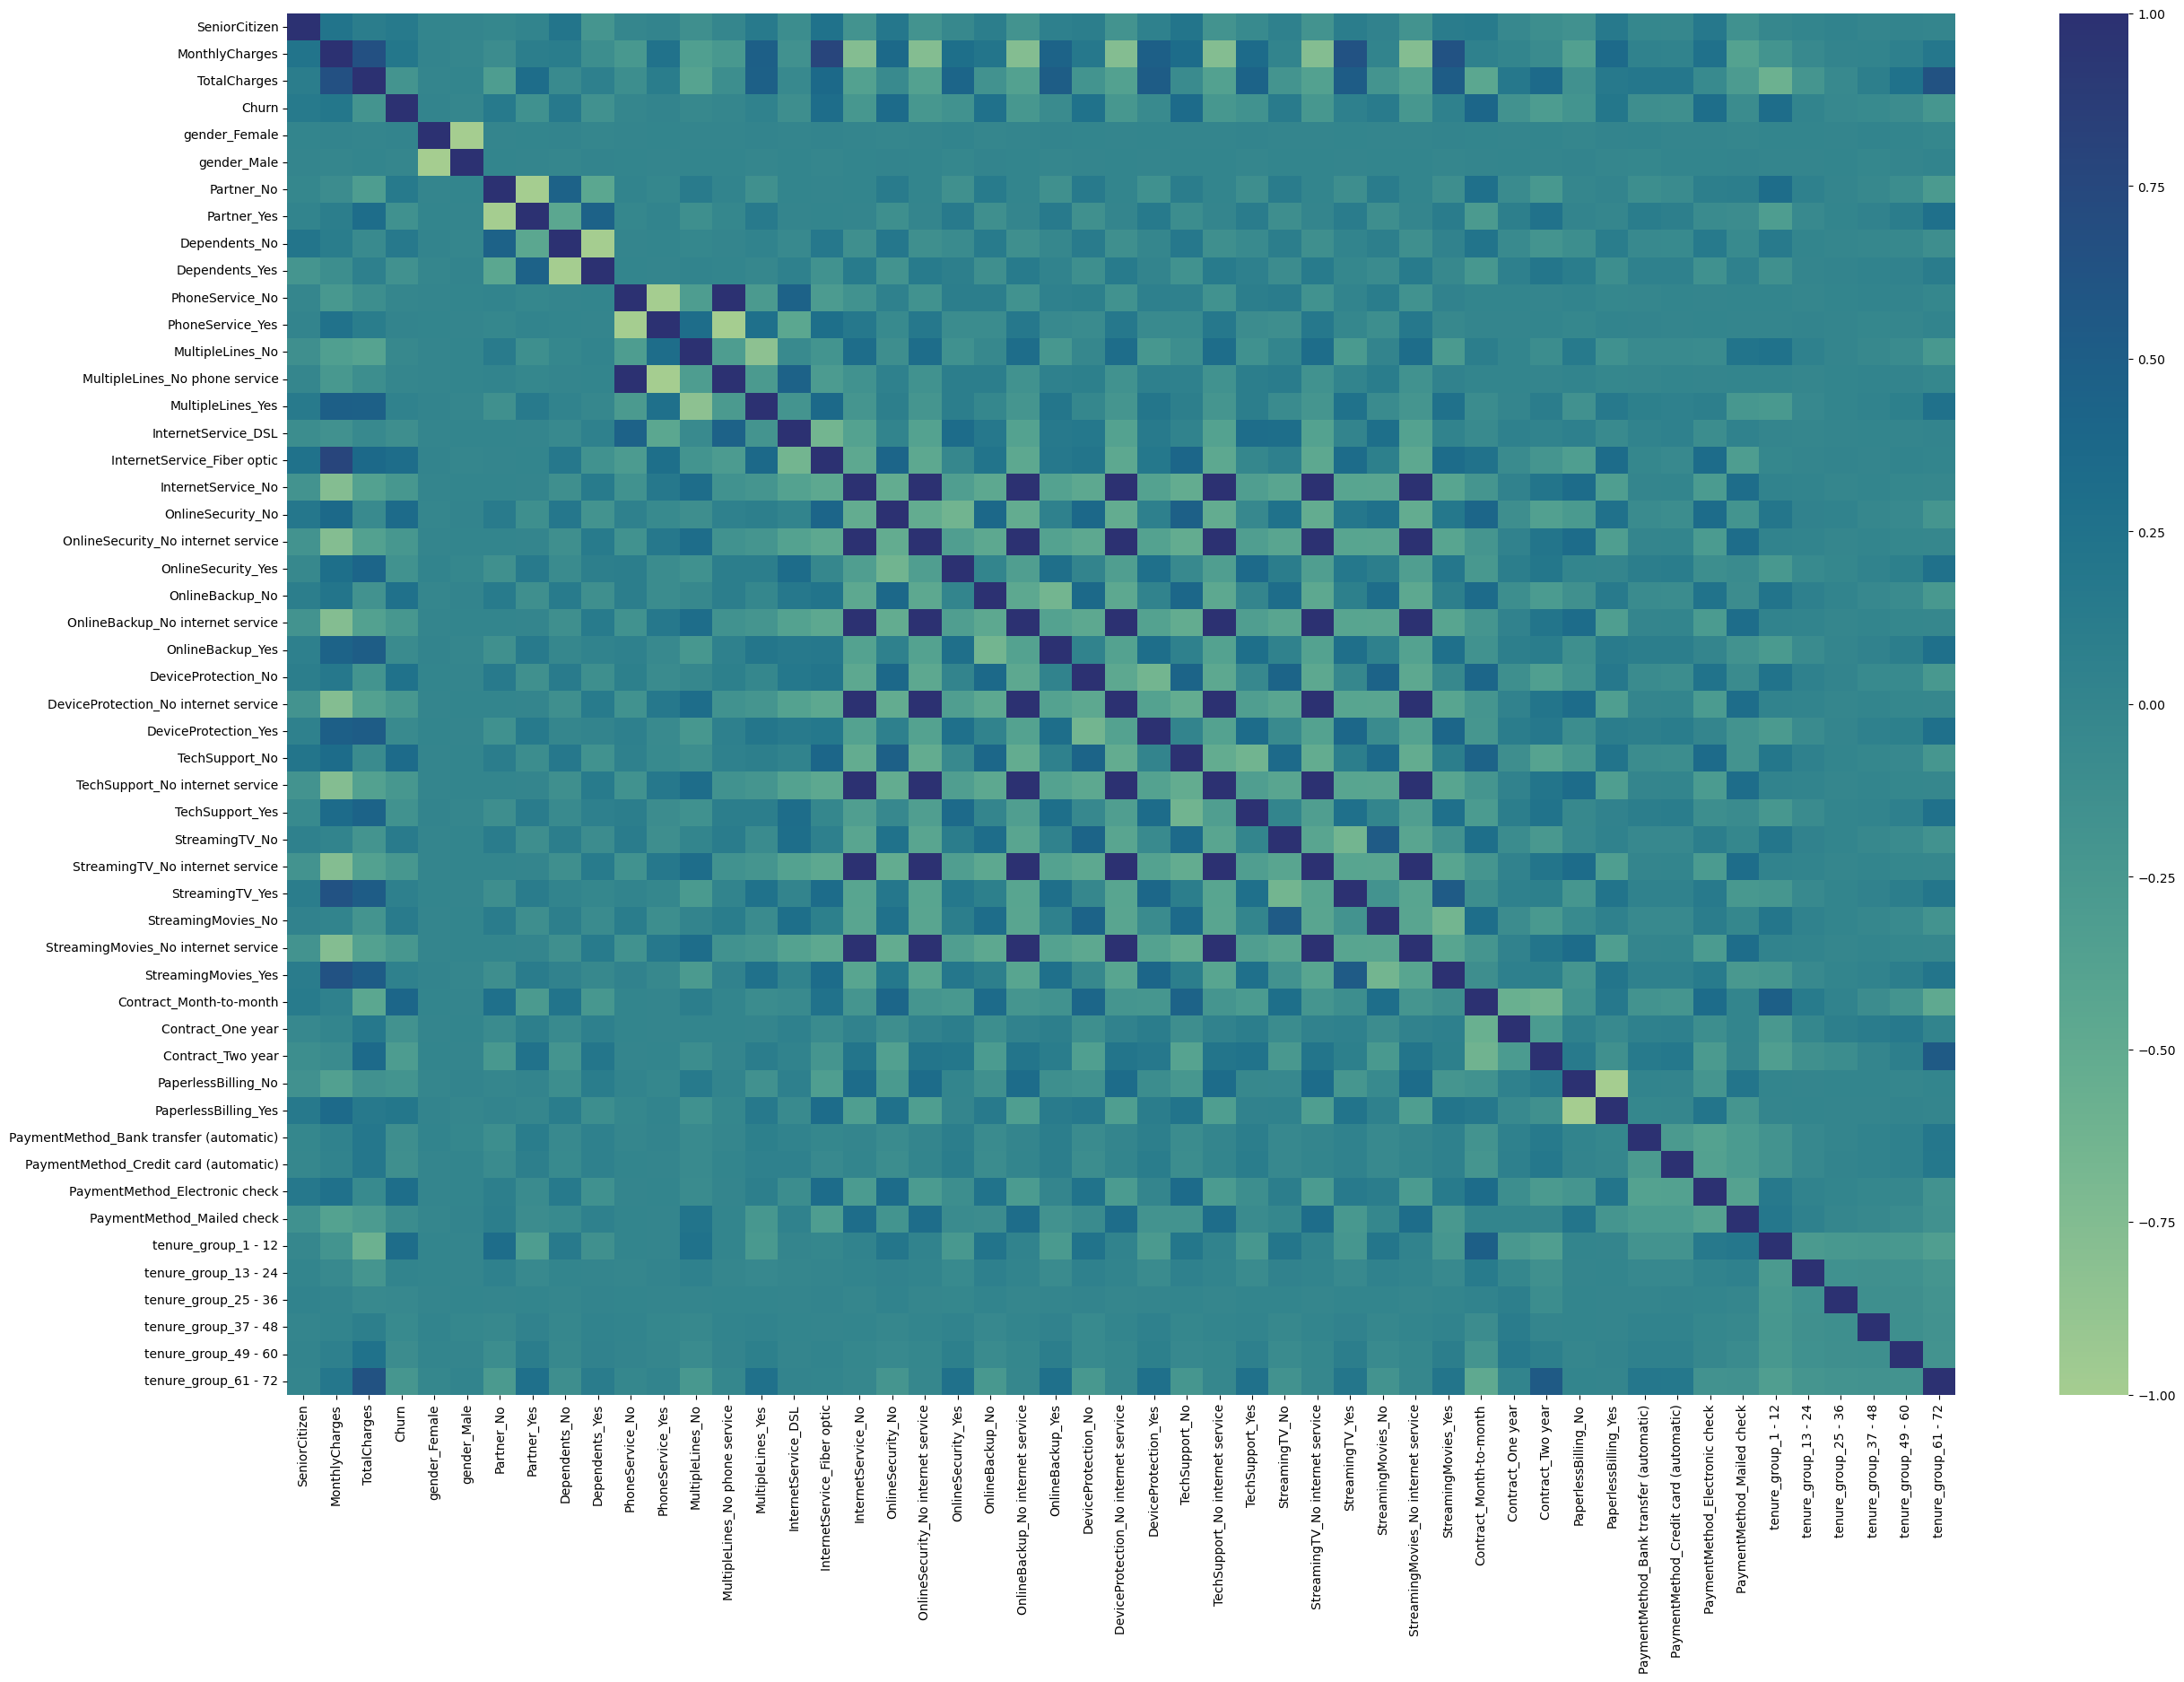

In [145]:
plt.figure(figsize=(30,20))
sns.heatmap(telco_data_dummies.corr(), cmap="crest")

#### Bivariate Analysis

In [153]:
new_telco_data0 = telco_data[telco_data["Churn"]==0]
new_telco_data1 = telco_data[telco_data["Churn"]==1]

In [158]:
def uniplot(df, col, title, hue):
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, hue = hue,palette='bright')
    plt.show()


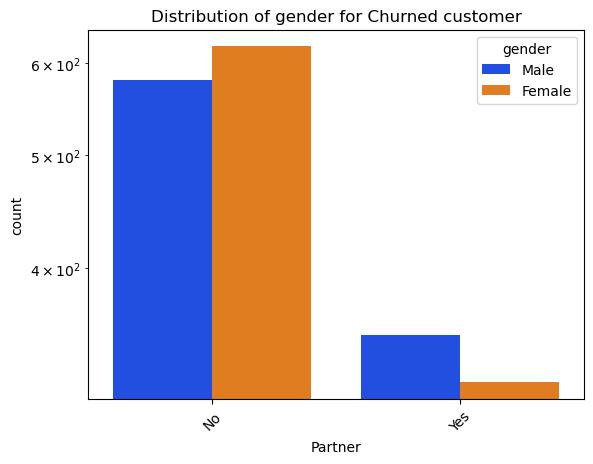

In [159]:
uniplot(new_telco_data1, col="Partner", title="Distribution of gender for Churned customer", hue="gender")

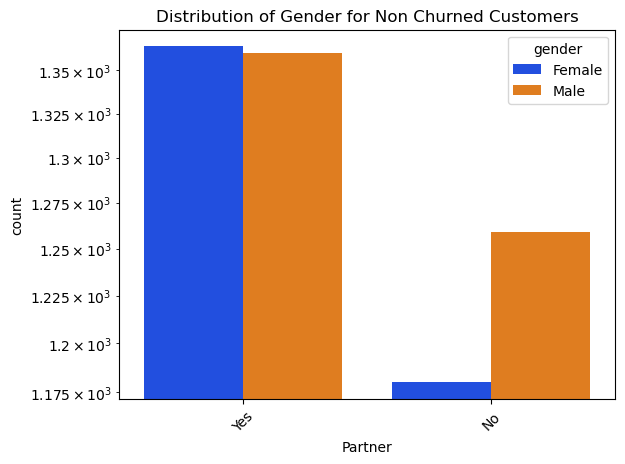

In [160]:
uniplot(new_telco_data0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


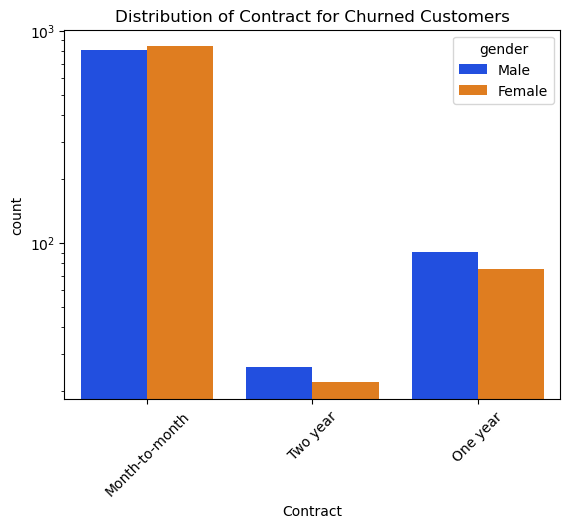

In [161]:
uniplot(new_telco_data1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


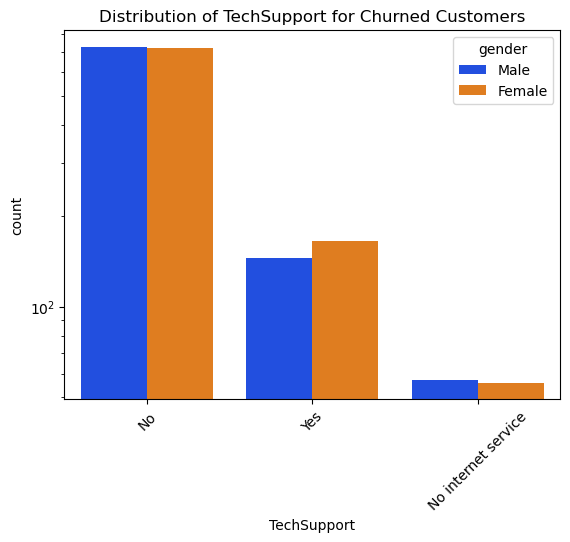

In [162]:
uniplot(new_telco_data1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


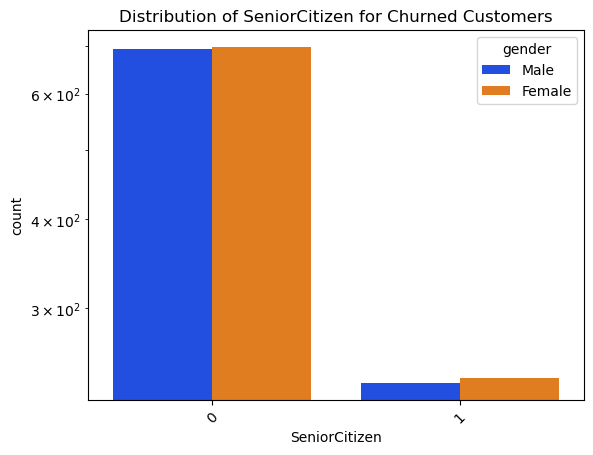

In [163]:
uniplot(new_telco_data1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')
